선형회귀분석 아오 제발 좀 해보자!!!!!

In [28]:
import numpy as np

데이터를 만들어보자

In [29]:
x_data=np.array([1,2,3,4,5])
x_data

array([1, 2, 3, 4, 5])

모양을 만들자. 2차원 데이터야

In [30]:
x_data=np.array([1,2,3,4,5]).reshape(5,1)
print(x_data)

[[1]
 [2]
 [3]
 [4]
 [5]]


In [31]:
t_data=np.array([3,5,7,9,11]).reshape(5,1)
print(t_data)

[[ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]]


w를 만들자
w는 값이 1개인 2차원 배열, b는 값이 1개인 1차원 배열

In [32]:
w=np.random.rand(1,1)
b=np.random.rand(1)
print(w)
print(b)

[[0.22315325]]
[0.448432]


손실함수 만들어보자
x,w 해야해 w,x 하면 안돼. w가 2개라면 
배열이
1 2  1 2
     2 3 이렇게 되면 배열 규칙에 의해서 곱하기가 안되는데 뒤로 보내면 해결 1 2 로 곱하는게 해결
     3 4

     근데 t-y나 y-t나 제곱하면 똑같다는데 무슨 말이지?

In [33]:
def loss_func(x,t):
  y=np.dot(x,w)+b
  return (np.sum((y-t)**2))/(len(x)) 

앞에 미분 했던 함수 가져옴.

In [34]:
def numerical_derivative(f,x):
  delta_x=1e-4
  grad=np.zeros_like(x) #0로 채워진 배열을 만들어

  it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite']) #읽,쓰반복자를 만든다.
  while not it.finished: #반복자가 끝이 아닌동안 반복한다.
    idx = it.multi_index
    tem_val = x[idx]
    x[idx]=tem_val+delta_x
    fx1=f(x)
    x[idx]=tem_val-delta_x
    fx2=f(x)
    grad[idx]=(fx1-fx2)/(2*delta_x)

    x[idx]=tem_val
    it.iternext()

  return grad

예측함수를 만들자.

In [35]:
def predict(x):
  return np.dot(x,w)+b

훈련을 하자!

In [36]:
leaning_rate=1e-2
cost_list=[]
f=lambda x: loss_func(x_data, t_data) #손실함수 f
print("Initial loss:", loss_func(x_data, t_data),"w=",w, "b=",b) #초기값 형성 출력

for step in range(5001): #훈련된 ()안에 숫자만 바꾸고 실행하면 그 값에서 다시 전체실행은 처음부터
  w-=leaning_rate*numerical_derivative(f, w)
  b-=leaning_rate*numerical_derivative(f, b)

  cost=loss_func(x_data, t_data) #loss_func구함
  cost_list.append([step, cost]) #그래프 그릴려고 만들었데

  if step % 10==0: #10으로 나눠서 1번 출력, 고로 10번마다 출력
    print("step:", step, "loss:", cost, "w:", w, "b:", b)


Initial loss: 40.91356638792821 w= [[0.22315325]] b= [0.448432]
step: 0 loss: 24.07185248363661 w: [[0.64715361]] b: [0.54063414]
step: 10 loss: 0.12350840953515214 w: [[1.94373798]] b: [0.82647396]
step: 20 loss: 0.00451072723072859 w: [[2.03381584]] b: [0.85139631]
step: 30 loss: 0.003678459580773604 w: [[2.03888814]] b: [0.85776441]
step: 40 loss: 0.003432489777749629 w: [[2.03801135]] b: [0.86266865]
step: 50 loss: 0.003204359538195975 w: [[2.03675692]] b: [0.86731904]
step: 60 loss: 0.0029913253442521177 w: [[2.0355162]] b: [0.87180598]
step: 70 loss: 0.0027924489290835222 w: [[2.03431541]] b: [0.87614075]
step: 80 loss: 0.002606794325020066 w: [[2.03315508]] b: [0.88032893]
step: 90 loss: 0.002433482851855934 w: [[2.03203398]] b: [0.88437548]
step: 100 loss: 0.0022716939073518633 w: [[2.03095078]] b: [0.8882852]
step: 110 loss: 0.0021206614233930327 w: [[2.02990421]] b: [0.89206272]
step: 120 loss: 0.0019796702619553777 w: [[2.02889303]] b: [0.89571251]
step: 130 loss: 0.00184805

이 결과치를 보면 w는 2에 근접하고, b는 1에 근접함을 확인함.
y=2x+1 이라는 식을 갖게 됨.

예측을 한번 해보자.
원래 식은 : y=wx+b

x : 입력 데이터
w : 기울기 (학습으로 구한 값)
b : 절편 (학습으로 구한 값)

In [37]:
data=np.array([[6], [7], [8]])
pred=predict(data)
pred

array([[13.        ],
       [15.00000001],
       [17.00000001]])

그래프를 그려보자

In [38]:
import matplotlib.pyplot as plt


In [40]:
cost_list

[[0, np.float64(24.07185248363661)],
 [1, np.float64(14.163431668217456)],
 [2, np.float64(8.334090018358324)],
 [3, np.float64(4.904590802379245)],
 [4, np.float64(2.886981226680331)],
 [5, np.float64(1.7000166197240763)],
 [6, np.float64(1.001733400434869)],
 [7, np.float64(0.5909453470473904)],
 [8, np.float64(0.34929016561542214)],
 [9, np.float64(0.20713338151579314)],
 [10, np.float64(0.12350840953515214)],
 [11, np.float64(0.07431463487560501)],
 [12, np.float64(0.04537398324308443)],
 [13, np.float64(0.028345910556956965)],
 [14, np.float64(0.01832409607207492)],
 [15, np.float64(0.012422533654707333)],
 [16, np.float64(0.008943713593201614)],
 [17, np.float64(0.006889262204200876)],
 [18, np.float64(0.005672055796728833)],
 [19, np.float64(0.004946864441423772)],
 [20, np.float64(0.00451072723072859)],
 [21, np.float64(0.004244350027684733)],
 [22, np.float64(0.004077635821246363)],
 [23, np.float64(0.003969411290968339)],
 [24, np.float64(0.0038955040601303483)],
 [25, np.flo

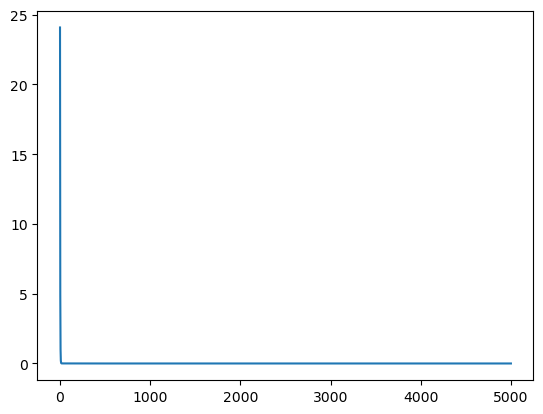

In [42]:
plt.plot(np.array(cost_list)[:,0], np.array(cost_list)[:,1]) #cost_list를 배열로 만들어주고
plt.show()

200번 하든 5000번하든 손실함수는 변함이 없어. 


다중선형회귀 실습

In [43]:
x_data1 = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
t_data1 = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]

x_data=np.array(x_data1) #각각 배열로 만들어줘
t_data=np.array(t_data1)
print(x_data)
print(t_data)

[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]]
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]]


w를 3개로 준비해야해. 값이 3개니까.
w를 어떻게 줄여나갈 것인지, w를 어떻게 준비할 것인지!!!!!!! 이게 핵심

In [44]:
w = np.random.rand(3,1) #값이 3개여야지 곱할수 있지.???
b = np.random.rand(1)
print(w,b)

[[0.69073881]
 [0.14969502]
 [0.18515114]] [0.97155501]


In [45]:
learning_rate=1e-6 
f=lambda x: loss_func(x_data, t_data)
print("Initial error value=", loss_func(x_data, t_data), 
"Initial w=", w, "b=",b)
for step in range(20001):
    w-=learning_rate*numerical_derivative(f, w)
    b-=learning_rate*numerical_derivative(f, b)
    if step % 400==0:
      print("step=", step, "error value=", 
         loss_func(x_data, t_data), "w=", w, "b=",b)

Initial error value= 6982.451463588802 Initial w= [[0.69073881]
 [0.14969502]
 [0.18515114]] b= [0.97155501]
step= 0 error value= 6381.345836204861 w= [[0.70500074]
 [0.16394392]
 [0.19957929]] b= [0.97171359]
step= 400 error value= 0.15587316913529684 w= [[1.01457685]
 [0.4736864 ]
 [0.51290727]] b= [0.97516557]
step= 800 error value= 0.15558434185700895 w= [[1.0143713 ]
 [0.47395072]
 [0.51284936]] b= [0.97517357]
step= 1200 error value= 0.15530170120316575 w= [[1.014168  ]
 [0.4742122 ]
 [0.51279202]] b= [0.97518158]
step= 1600 error value= 0.15502511451500892 w= [[1.01396691]
 [0.47447087]
 [0.51273525]] b= [0.97518961]
step= 2000 error value= 0.1547544519797996 w= [[1.01376803]
 [0.47472678]
 [0.51267904]] b= [0.97519765]
step= 2400 error value= 0.15448958656841164 w= [[1.01357133]
 [0.47497994]
 [0.51262338]] b= [0.9752057]
step= 2800 error value= 0.1542303939756713 w= [[1.01337678]
 [0.47523039]
 [0.51256828]] b= [0.97521378]
step= 3200 error value= 0.1539767525619095 w= [[1.013

w를 어떻게 준비를 해야하는가?

y=1x+1

다중데이터 파일로 실습하기

In [47]:
import pandas as pd

In [48]:

df=pd.read_csv('../data02/data-01-test-score.csv', header=None)
df

,0,1,2,3
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


데이터 프레임의 values 확인

In [49]:
df.values

array([[ 73,  80,  75, 152],
       [ 93,  88,  93, 185],
       [ 89,  91,  90, 180],
       [ 96,  98, 100, 196],
       [ 73,  66,  70, 142],
       [ 53,  46,  55, 101],
       [ 69,  74,  77, 149],
       [ 47,  56,  60, 115],
       [ 87,  79,  90, 175],
       [ 79,  70,  88, 164],
       [ 69,  70,  73, 141],
       [ 70,  65,  74, 141],
       [ 93,  95,  91, 184],
       [ 79,  80,  73, 152],
       [ 70,  73,  78, 148],
       [ 93,  89,  96, 192],
       [ 78,  75,  68, 147],
       [ 81,  90,  93, 183],
       [ 88,  92,  86, 177],
       [ 78,  83,  77, 159],
       [ 82,  86,  90, 177],
       [ 86,  82,  89, 175],
       [ 78,  83,  85, 175],
       [ 76,  83,  71, 149],
       [ 96,  93,  95, 192]])

df.values에서 입력값(data)과 정답(t_data) 값 추출

In [50]:
x_data=df.values[:, :-1]
print(x_data)

t_data=df.values[:, [-1]]
print(t_data)

[[ 73  80  75]
 [ 93  88  93]
 [ 89  91  90]
 [ 96  98 100]
 [ 73  66  70]
 [ 53  46  55]
 [ 69  74  77]
 [ 47  56  60]
 [ 87  79  90]
 [ 79  70  88]
 [ 69  70  73]
 [ 70  65  74]
 [ 93  95  91]
 [ 79  80  73]
 [ 70  73  78]
 [ 93  89  96]
 [ 78  75  68]
 [ 81  90  93]
 [ 88  92  86]
 [ 78  83  77]
 [ 82  86  90]
 [ 86  82  89]
 [ 78  83  85]
 [ 76  83  71]
 [ 96  93  95]]
[[152]
 [185]
 [180]
 [196]
 [142]
 [101]
 [149]
 [115]
 [175]
 [164]
 [141]
 [141]
 [184]
 [152]
 [148]
 [192]
 [147]
 [183]
 [177]
 [159]
 [177]
 [175]
 [175]
 [149]
 [192]]


이전까지는 파이썬으로 선형회귀한거 아래부터는 파이토치로 하는 것

파이토치로 선형회귀하기

1. 기본세팅

nn 은 많은 라이브러리를 가지고 있고
functional은 함수를 사용하게 해줘
optim은 최적화 하는데 사용

In [53]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

seed 값을 안주면 할때마다 random 값이 달라져. 하나의 값이 아니라서 새로 생겨!!!!!!
값 맨날 달라져!!!!


In [54]:
torch.manual_seed(1)

변수선언

In [55]:
#변수선언
x_train= torch.FloatTensor([[1], [2], [3]]) #long으로 주면 안되고 연속된 실수 float으로 줘야해.
y_train= torch.FloatTensor([[2], [4], [6]]) #가중치는 2? 2차원 텐서?

In [56]:
print(x_train)
print(x_train.shape)
print(y_train)
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])
tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


# 3. 가중치와편향의초기화
# 가중치W와편향b를0으로초기화하고
학습을 통해 값이 변경되는 변수임을 명시함.
아래 코드는 𝑦=0×𝑥+0 형식으로 만든거야.

In [57]:
#모델을 초기화
W = torch.zeros(1, requires_grad=True) #업데이트 가능하도록 설정
print(W) 
b = torch.zeros(1, requires_grad=True) 
print(b)

tensor([0.], requires_grad=True)
tensor([0.], requires_grad=True)


# 4. 가설세우기
# 직선의방정식에해당되는가설을선언.
𝐻𝑥 =𝑊𝑥+𝑏=>  𝐻𝑥 =𝑋𝑊+𝑏로변환

In [58]:
hypothesis = x_train* W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)



#5. 비용함수선언하기
#선형회귀의비용함수에해당되는평균제곱오차를선언.

In [59]:
cost = torch.mean((hypothesis -y_train) ** 2) 
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


6. 경사하강법구현하기
#'SGD'는경사하강법의종류,  lr은학습률(learning rate)를의미
# 학습대상인W와b가SGD의입력됨.

GD 는 훈련데이터 100만개를 읽어서 그 다음에 손실환수를 구하고 최적화.

SGD는 데이터가 너무 많을 때 한번에 가지고 올수 있는 벤치사이드 100만개중 100개 씩 읽어와서 
손실함수 구하고 w와 b를 최적화. 랜덤하게 100개 가지고 와, 이미 선택한 것을 제외하고 나머지 100개씩 
w와 b를 업데이트하는 속도는 빨라져.
메모리 문제를 해결하기 위해서
단, 단체가 아니라서 값이 약간 다를 수 있어.
고를때 확률적으로 구한다고 해서 SGD라고 불러

In [60]:
optimizer = optim.SGD([W, b], lr=0.01) #손실함수를 최적화 시키는 otim을 sgd로 하고, 러닝메이트는 0.01로 씁니다.
# gradient를 0으로 초기화 -> 이전 값을 가지고 있으면 안되니까
optimizer.zero_grad() 

# 비용함수를 미분하여 gradient 계산 -> 파이토치가 딥러닝용이라서 뒷쪽 레이어부터 계산한다. 앞으로 이동
cost.backward() 

# W와b를업데이트
optimizer.step() 

해보자. 위는 이론 설명이었어.

데이터

In [61]:
x_train= torch.FloatTensor([[1], [2], [3]])
y_train= torch.FloatTensor([[2], [4], [6]])

In [62]:
# 모델초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [63]:
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

epochs 훈련데이터를 처음부터 전체를 한번 읽는데 1 epochs
nb_epochs = 2001 로 하면 2000번 읽는다는거야.

In [64]:
nb_epochs= 1999 # 원하는만큼경사하강법을반복
for epoch in range(nb_epochs+ 1):
  # H(x) 계산
  hypothesis = x_train* W + b
  # cost 계산
  cost = torch.mean((hypothesis -y_train) ** 2)
  # cost로H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step() #업데이트 하는 것 
  # 2000번 읽은 걸 100번마다로그출력 
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
    epoch, nb_epochs, W.item(), b.item(), cost.item()
    ))

#문자열.format (실제 들어갈 값) {:4d} 정수 자리 차지해라. 3f 소수점 3자리 6f 소수점 6자리로 나타내라.

Epoch    0/1999 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/1999 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/1999 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/1999 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/1999 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/1999 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/1999 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/1999 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/1999 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/1999 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/1999 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/1999 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/1999 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/1999 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/1999 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/1999 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/1999 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/1999 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/1999 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/1999 W: 1.997, b: 0.008 Cost: 0.000008